# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#API Key
from api_keys import weather_api_key

#Import cities
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
#List of latitudes and longitudes
lat_lngs = []

#List of cities
cities = []

#Range of lats and lngs
lat_range = (-90,90)
lng_range = (-180,180)

#Randomly generate latitudes and longitudes
lats = np.random.uniform(lat_range[0],lat_range[1],size=1500)
lngs = np.random.uniform(lng_range[0],lng_range[1],size=1500)
lat_lngs = zip(lats,lngs)

#Find the nearest city for each coordinate pair
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    #Add unique cities to cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the starter code

In [3]:
#Base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

#City data list
city_data = []

#Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    #Create endpoint URL with each city
    city_url = url + city
    
    #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | senneterre
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | vostok
Processing Record 6 of Set 1 | aksarka
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | ocos
Processing Record 10 of Set 1 | tchibanga
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | huilong
Processing Record 14 of Set 1 | kavieng
Processing Record 15 of Set 1 | wilmington
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 1 | tubruq
City not found. Skipping...
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | budapest
Processing Record

Processing Record 41 of Set 4 | launceston
Processing Record 42 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 43 of Set 4 | kibala
Processing Record 44 of Set 4 | berdigestyakh
Processing Record 45 of Set 4 | waingapu
Processing Record 46 of Set 4 | ekhabi
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | namibe
Processing Record 49 of Set 4 | mackay
Processing Record 0 of Set 5 | hualmay
Processing Record 1 of Set 5 | naryan-mar
Processing Record 2 of Set 5 | bambous virieux
Processing Record 3 of Set 5 | hearst
Processing Record 4 of Set 5 | tabatinga
Processing Record 5 of Set 5 | ilulissat
Processing Record 6 of Set 5 | kavaratti
Processing Record 7 of Set 5 | navalmoral de la mata
Processing Record 8 of Set 5 | khargone
Processing Record 9 of Set 5 | meadow lake
Processing Record 10 of Set 5 | nipawin
Processing Record 11 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 12 of Set 5 | qaqortoq
Processing Record 13 of Se

Processing Record 29 of Set 8 | pozo colorado
Processing Record 30 of Set 8 | micheweni
Processing Record 31 of Set 8 | sao jose da coroa grande
Processing Record 32 of Set 8 | cayenne
Processing Record 33 of Set 8 | longlac
City not found. Skipping...
Processing Record 34 of Set 8 | auki
Processing Record 35 of Set 8 | sola
Processing Record 36 of Set 8 | oxapampa
Processing Record 37 of Set 8 | sept-iles
Processing Record 38 of Set 8 | nemuro
Processing Record 39 of Set 8 | piacabucu
Processing Record 40 of Set 8 | bako
Processing Record 41 of Set 8 | moba
Processing Record 42 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 43 of Set 8 | tanete
Processing Record 44 of Set 8 | riyadh
Processing Record 45 of Set 8 | valdivia
Processing Record 46 of Set 8 | cassilandia
Processing Record 47 of Set 8 | hat yai
Processing Record 48 of Set 8 | paramonga
Processing Record 49 of Set 8 | malwan
City not found. Skipping...
Processing Record 0 of Set 9 | aflao
Processing R

City not found. Skipping...
Processing Record 14 of Set 12 | urla
Processing Record 15 of Set 12 | cap malheureux
Processing Record 16 of Set 12 | berbera
Processing Record 17 of Set 12 | procida
Processing Record 18 of Set 12 | dryden
Processing Record 19 of Set 12 | moerai
Processing Record 20 of Set 12 | hadrut
Processing Record 21 of Set 12 | krasnoshchekovo
Processing Record 22 of Set 12 | dunedin
Processing Record 23 of Set 12 | dom pedrito
Processing Record 24 of Set 12 | santiago
Processing Record 25 of Set 12 | delta del tigre
Processing Record 26 of Set 12 | pitimbu
Processing Record 27 of Set 12 | jiddah
City not found. Skipping...
Processing Record 28 of Set 12 | duartina
Processing Record 29 of Set 12 | rocha
Processing Record 30 of Set 12 | asyut
Processing Record 31 of Set 12 | hue
Processing Record 32 of Set 12 | durres
Processing Record 33 of Set 12 | haimen
Processing Record 34 of Set 12 | jujuy
City not found. Skipping...
Processing Record 35 of Set 12 | ugoofaaru
Pr

In [4]:
#Convert into DataFrame
city_data_df = pd.DataFrame(city_data)

#Show record count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
#Display preview
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,8.06,53,40,8.23,CL,1681240074
1,bluff,-46.6000,168.3333,11.56,92,100,8.46,NZ,1681240333
2,senneterre,48.3835,-77.2328,7.64,78,100,6.50,CA,1681240333
3,kodiak,57.7900,-152.4072,0.73,86,100,2.57,US,1681240105
4,vostok,46.4856,135.8833,-2.98,94,100,5.80,RU,1681240334


In [6]:
#Export city data to csv
city_data_df = city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
#Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

#Display preview
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,8.06,53,40,8.23,CL,1681240074
1,bluff,-46.6000,168.3333,11.56,92,100,8.46,NZ,1681240333
2,senneterre,48.3835,-77.2328,7.64,78,100,6.50,CA,1681240333
3,kodiak,57.7900,-152.4072,0.73,86,100,2.57,US,1681240105
4,vostok,46.4856,135.8833,-2.98,94,100,5.80,RU,1681240334


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

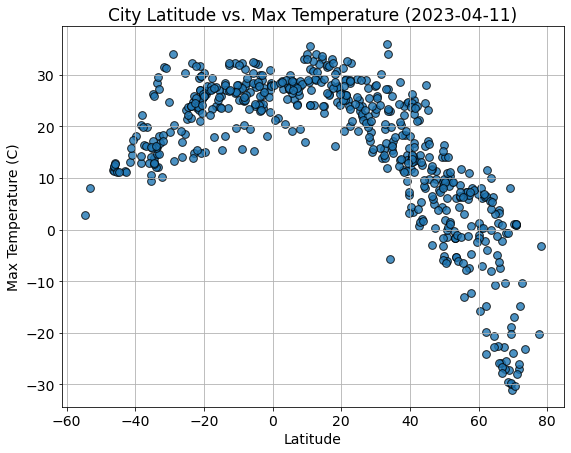

In [8]:
#Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=0.8,s=60)

#Date conversion
time_structure = time.localtime(city_data_df.iloc[0,8])
date = time.strftime("%Y-%m-%d", time_structure)
date

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Max Temperature (C)",size=14)
plt.title(f"City Latitude vs. Max Temperature ({date})",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig1.png")

#Show plot
plt.show()

#### Latitude Vs. Humidity

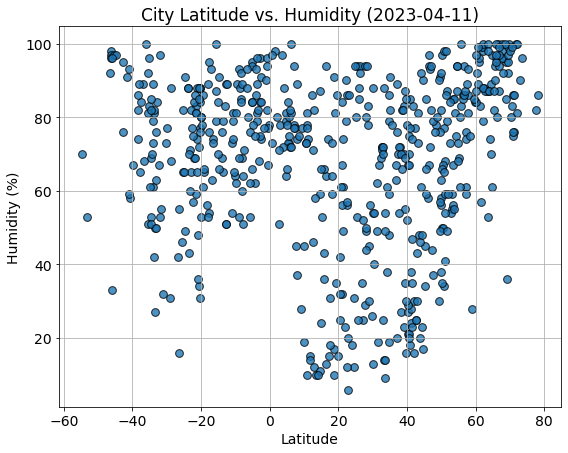

In [9]:
#Build scatter plot for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=.8,s=60)

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Humidity (%)",size=14)
plt.title(f"City Latitude vs. Humidity ({date})",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig2.png")

#Show plot
plt.show()

#### Latitude Vs. Cloudiness

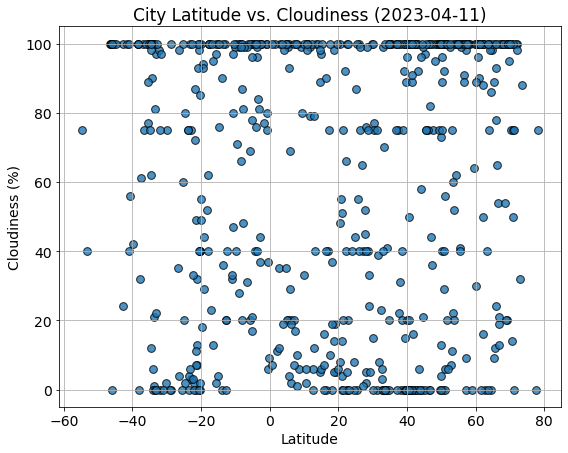

In [10]:
#Build scatter plot for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=.8,s=60)

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Cloudiness (%)",size=14)
plt.title(f"City Latitude vs. Cloudiness ({date})",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig3.png")

#Show plot
plt.show()

#### Latitude vs. Wind Speed

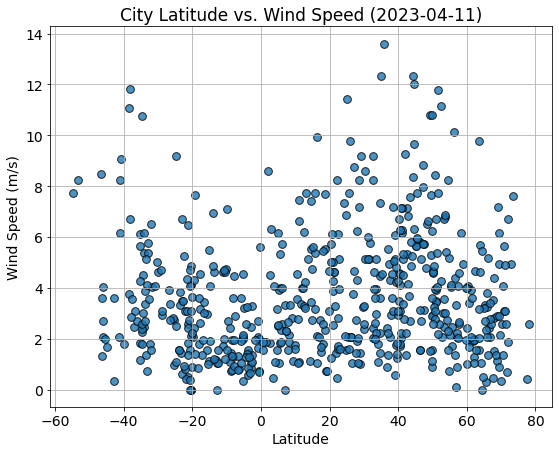

In [11]:
#Build scatter plot for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=.8,s=60)

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Wind Speed (m/s)",size=14)
plt.title(f"City Latitude vs. Wind Speed ({date})",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig4.png")

#Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [12]:
#Define a function to create Linear Regression plots
def lr(a,b,c,d,e,f):
    
    #Build scatter plot for chosen a,b
    plt.figure(figsize=(9,7))
    plt.scatter(a,b,s=60)

    #Incorporate the other graph properties
    plt.tick_params(axis='both',which='major',labelsize=14)
    plt.xlabel(c,size=14)
    plt.ylabel(d,size=14)
    
    #Regression
    (slope, intercept, r, p, stderr) = linregress(a,b)
    line = slope*a + intercept
    plt.plot(a,line,"r-")
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(e,f),color="red",size=22)
    print(f"The coefficient of determination is: {r**2}")
    
    #Show plot
    plt.show()

In [13]:
#Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

#Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,senneterre,48.3835,-77.2328,7.64,78,100,6.50,CA,1681240333
3,kodiak,57.7900,-152.4072,0.73,86,100,2.57,US,1681240105
4,vostok,46.4856,135.8833,-2.98,94,100,5.80,RU,1681240334
5,aksarka,66.5606,67.7975,-25.87,100,54,2.41,RU,1681240334
7,kapaa,22.0752,-159.3190,25.18,79,40,8.23,US,1681240335


In [14]:
#Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

#Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,8.06,53,40,8.23,CL,1681240074
1,bluff,-46.6000,168.3333,11.56,92,100,8.46,NZ,1681240333
6,chuy,-33.6971,-53.4616,28.31,42,21,3.87,UY,1681240335
9,tchibanga,-2.8500,11.0333,23.63,96,100,1.06,GA,1681240335
12,kavieng,-2.5744,150.7967,27.44,74,100,3.30,PG,1681240337


###  Temperature vs. Latitude Linear Regression Plot

The coefficient of determination is: 0.7136173607646318


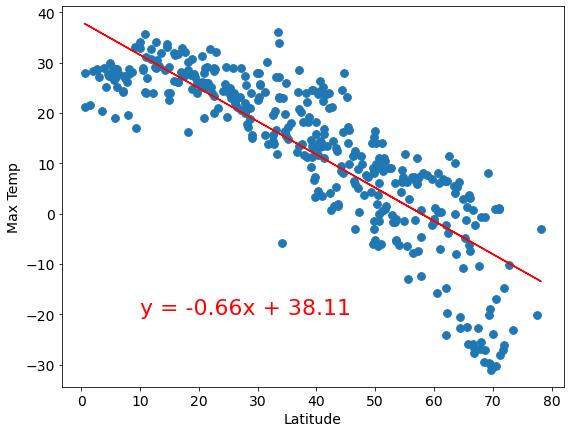

In [15]:
#Linear regression on Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Max Temp"]
c = "Latitude"
d = "Max Temp"
e = 10
f = -20
lr(a,b,c,d,e,f)

The coefficient of determination is: 0.46192421767655684


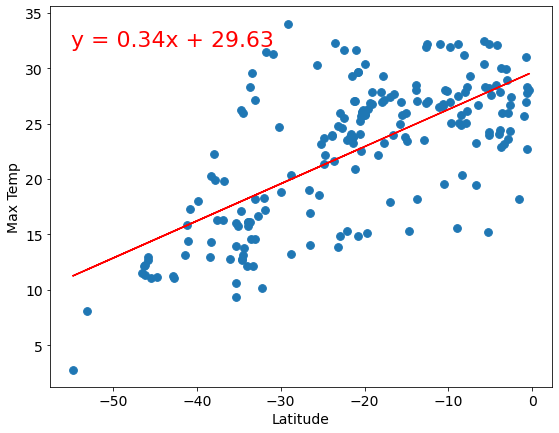

In [16]:
#Linear regression on Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Max Temp"]
c = "Latitude"
d = "Max Temp"
e = -55
f = 32
lr(a,b,c,d,e,f)

**Discussion about the linear relationship:**
- The plot for latitude vs. max temperature in the northern hemisphere has a coefficient of determination close to 1. This means that the regression model is fairly accurate at predicting the dependent variable (Max Temp) when given the independent variable (Latitude). The linear relationship between the two variables is fairly strong and predictable. As the latitude increases (as one goes further north from the equator), the Max Temp decreases in a predicatble manner.
- In contrast, the same plot for the southern hemisphere has a coefficient of determination much further away from 1 or -1. This means that the regression model is not as accurate at predicting Max Temp when given the Latitude. The linear relationship between the two variables is much weaker in the southern hemisphere than in the northern hemisphere. However, in general terms, the further one goes south from the equator, the lower the Max Temp.

### Humidity vs. Latitude Linear Regression Plot

The coefficient of determination is: 0.11551381702782818


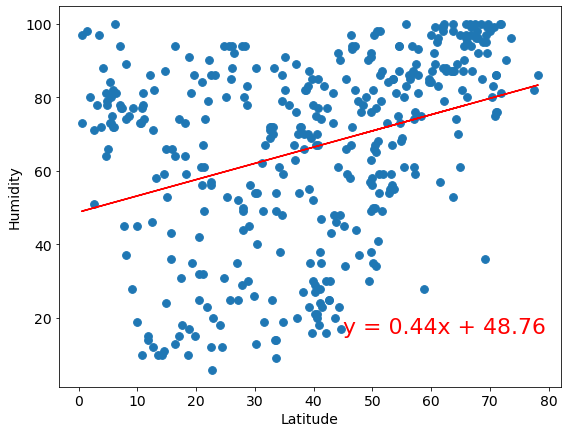

In [17]:
#Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Humidity"]
c = "Latitude"
d = "Humidity"
e = 45
f = 16
lr(a,b,c,d,e,f)

The coefficient of determination is: 0.010437807679197263


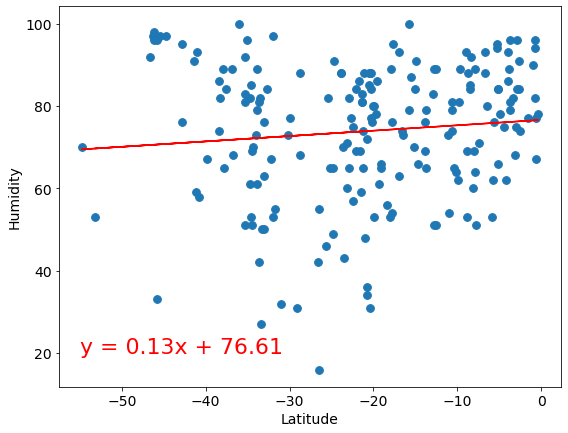

In [18]:
#Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Humidity"]
c = "Latitude"
d = "Humidity"
e = -55
f = 20
lr(a,b,c,d,e,f)

**Discussion about the linear relationship:**
- The coefficients of determination for both "Humidity vs. Latitude" plots are close to zero. This means that the regression model is not accurate at predicting Humidity when given the Latitude. The scatter plot points look completely unrelated to the regression line. According to this data, the linear relationship between Humidty and Latitude is weak.

### Cloudiness vs. Latitude Linear Regression Plot

The coefficient of determination is: 0.04044924456703012


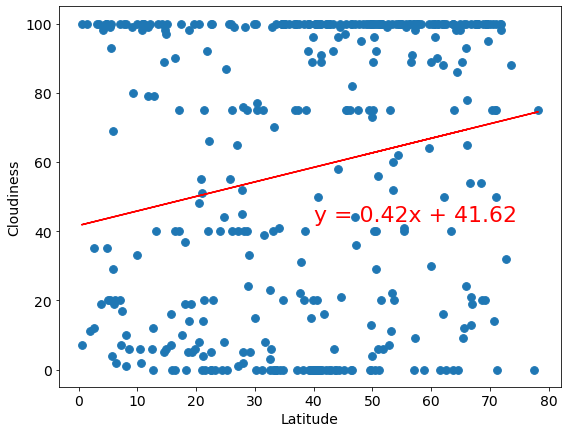

In [19]:
#Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Cloudiness"]
c = "Latitude"
d = "Cloudiness"
e = 40
f = 43
lr(a,b,c,d,e,f)

The coefficient of determination is: 0.0012640504816413566


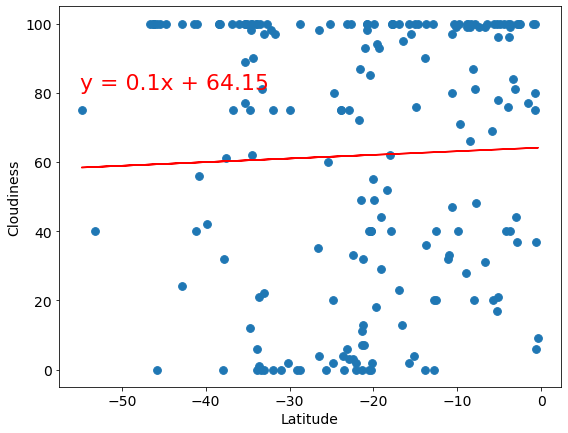

In [20]:
#Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Cloudiness"]
c = "Latitude"
d = "Cloudiness"
e = -55
f = 81
lr(a,b,c,d,e,f)

**Discussion about the linear relationship:**
- Similar to the Humidity plots, the coefficients of determination for the Cloudiness vs. Latitude plots are close to zero. This means that the regression model is not accurate at predicting Cloudiness when given the Latitude. The scatter plot points look completely unrelated to the regression line. According to this data, the linear relationship between Cloudiness and Latitude is weak.

### Wind Speed vs. Latitude Linear Regression Plot

The coefficient of determination is: 0.0003072185516138294


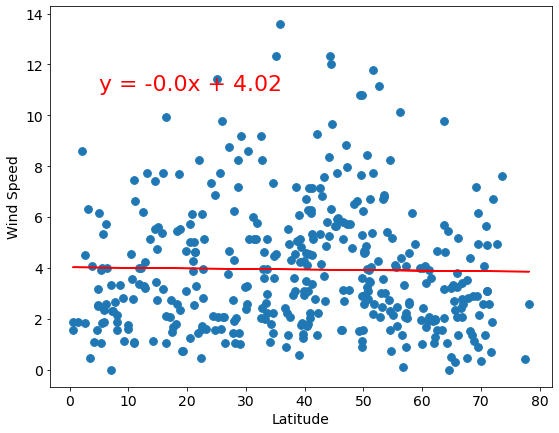

In [21]:
#Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Wind Speed"]
c = "Latitude"
d = "Wind Speed"
e = 5
f = 11
lr(a,b,c,d,e,f,)

The coefficient of determination is: 0.15961050109310224


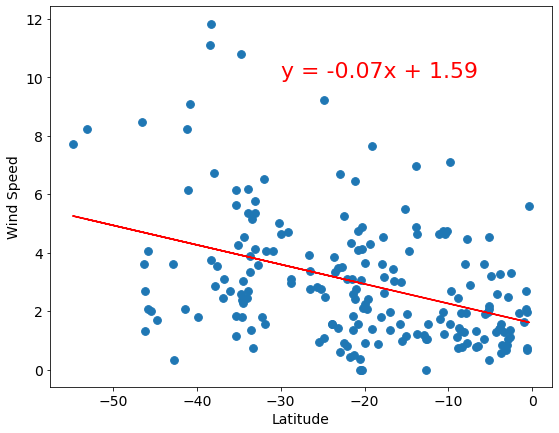

In [22]:
#Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Wind Speed"]
c = "Latitude"
d = "Wind Speed"
e = -30
f = 10
lr(a,b,c,d,e,f)

**Discussion about the linear relationship:**
- Once again, these plots show a weak linear relationship between the dependent and independent variables. The coefficients of determination for the Wind Speed vs. Latitude plots are close to zero (although the coefficient for the Southern Hemisphere is a little further from zero, it is still not high enough to suggest a close relationship between the variables). This means that the regression model is not accurate at predicting Wind Speed when given the Latitude. The scatter plot points look completely unrelated to the Northern Hemisphere's regression line, and there are too many scatter points far away from the Souther Hemisphere's regression line. According to this data, the linear relationship between Wind Speed and Latitude is weak.